In [930]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [931]:
data=yf.download("NVDA", start="2010-01-01",end="2024-08-12")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,0.462750,0.465500,0.452750,0.462250,0.423988,800204000
2010-01-05,0.460500,0.474000,0.460500,0.469000,0.430179,728648000
2010-01-06,0.468750,0.473000,0.464250,0.472000,0.432931,649168000
2010-01-07,0.469500,0.471500,0.459250,0.462750,0.424447,547792000
2010-01-08,0.459000,0.467000,0.456250,0.463750,0.425364,478168000
...,...,...,...,...,...,...
2024-08-05,92.059998,103.410004,90.690002,100.449997,100.449997,552842400
2024-08-06,103.839996,107.709999,100.550003,104.250000,104.250000,409012100
2024-08-07,107.809998,108.800003,98.690002,98.910004,98.910004,411440400


In [932]:
data=data[["Close"]]

In [933]:
data

,Close
Date,
2010-01-04,0.462250
2010-01-05,0.469000
2010-01-06,0.472000
2010-01-07,0.462750
2010-01-08,0.463750
...,...
2024-08-05,100.449997
2024-08-06,104.250000
2024-08-07,98.910004


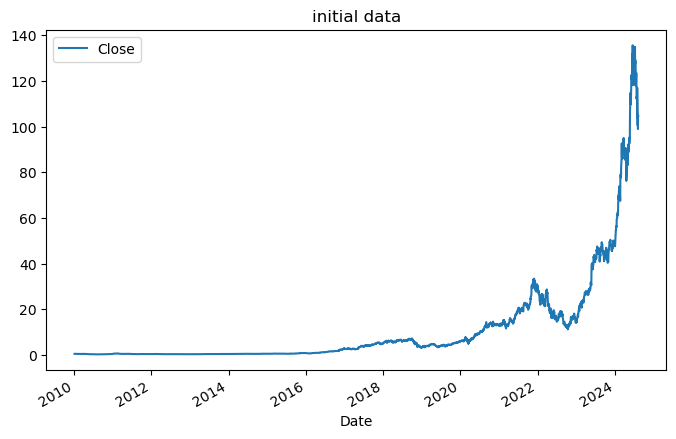

In [934]:
data["Close"].plot(figsize=(8,5) , title="initial data" )
plt.legend()
plt.show()

In [935]:
data

,Close
Date,
2010-01-04,0.462250
2010-01-05,0.469000
2010-01-06,0.472000
2010-01-07,0.462750
2010-01-08,0.463750
...,...
2024-08-05,100.449997
2024-08-06,104.250000
2024-08-07,98.910004


In [936]:
data["n_returns"]=data.Close.pct_change().dropna()

C:\Users\Ashutosh raj\AppData\Local\Temp\ipykernel_1656\2085055623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["n_returns"]=data.Close.pct_change().dropna()


In [937]:
data

,Close,n_returns
Date,,
2010-01-04,0.462250,NaN
2010-01-05,0.469000,0.014603
2010-01-06,0.472000,0.006397
2010-01-07,0.462750,-0.019597
2010-01-08,0.463750,0.002161
...,...,...
2024-08-05,100.449997,-0.063578
2024-08-06,104.250000,0.037830
2024-08-07,98.910004,-0.051223


In [938]:
data.head(5)

,Close,n_returns
Date,,
2010-01-04,0.46225,NaN
2010-01-05,0.46900,0.014603
2010-01-06,0.47200,0.006397
2010-01-07,0.46275,-0.019597
2010-01-08,0.46375,0.002161


In [939]:
data["log_returns"]=np.log(data.Close.div(data.Close.shift(1)))

C:\Users\Ashutosh raj\AppData\Local\Temp\ipykernel_1656\1947793903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["log_returns"]=np.log(data.Close.div(data.Close.shift(1)))


In [940]:
data

,Close,n_returns,log_returns
Date,,,
2010-01-04,0.462250,NaN,NaN
2010-01-05,0.469000,0.014603,0.014497
2010-01-06,0.472000,0.006397,0.006376
2010-01-07,0.462750,-0.019597,-0.019792
2010-01-08,0.463750,0.002161,0.002159
...,...,...,...
2024-08-05,100.449997,-0.063578,-0.065689
2024-08-06,104.250000,0.037830,0.037132
2024-08-07,98.910004,-0.051223,-0.052581


In [941]:
data.head(5)

,Close,n_returns,log_returns
Date,,,
2010-01-04,0.46225,NaN,NaN
2010-01-05,0.46900,0.014603,0.014497
2010-01-06,0.47200,0.006397,0.006376
2010-01-07,0.46275,-0.019597,-0.019792
2010-01-08,0.46375,0.002161,0.002159


# log vs normal returns

In [942]:
n_returns_mean=data["n_returns"].mean()
n_returns_mean

0.0018830734548324387

In [943]:
log_returns_mean=data["log_returns"].mean()
log_returns_mean

0.0014761094120565677

In [944]:
182*1.000472*1.000472

182.171848546688

In [945]:
182*np.exp(log_returns_mean*2)

182.53809772628682

# log returns are more more accurate than simple returns 

In [946]:
data=data.dropna()
data

,Close,n_returns,log_returns
Date,,,
2010-01-05,0.469000,0.014603,0.014497
2010-01-06,0.472000,0.006397,0.006376
2010-01-07,0.462750,-0.019597,-0.019792
2010-01-08,0.463750,0.002161,0.002159
2010-01-11,0.457250,-0.014016,-0.014115
...,...,...,...
2024-08-05,100.449997,-0.063578,-0.065689
2024-08-06,104.250000,0.037830,0.037132
2024-08-07,98.910004,-0.051223,-0.052581


In [947]:
data["n_returns"].sum()

6.918411873054381

In [948]:
data["log_returns"].sum()

5.423225979895831

In [949]:
def moving_avg_strategy_signal(data, short_window, long_window):
    signals=pd.DataFrame(index=data.index)
    signals['signal']=0.0
    
    signals["short_avg"]=data["Close"].rolling(window=short_window,min_periods=1,center=False).mean()
    signals["long_avg"]=data["Close"].rolling(window=long_window, min_periods=1, center=False).mean()
    
    signals['signal'][short_window:]=np.where(signals['short_avg'][short_window:]> signals['long_avg'][short_window:],1,0)
    signals['position']=signals['signal'].ffill().shift()
    
    return signals

In [950]:
signal=moving_avg_strategy_signal(data,40,100)

In [951]:
signal=signal.dropna()

In [952]:
signal

,signal,short_avg,long_avg,position
Date,,,,
2010-01-06,0.0,0.470500,0.470500,0.0
2010-01-07,0.0,0.467917,0.467917,0.0
2010-01-08,0.0,0.466875,0.466875,0.0
2010-01-11,0.0,0.464950,0.464950,0.0
2010-01-12,0.0,0.461083,0.461083,0.0
...,...,...,...,...
2024-08-05,1.0,122.283200,104.573200,1.0
2024-08-06,1.0,121.867250,104.706820,1.0
2024-08-07,1.0,121.295250,104.816480,1.0


In [953]:
data["strategy"]=data["n_returns"]*signal["position"].shift(1)

C:\Users\Ashutosh raj\AppData\Local\Temp\ipykernel_1656\42276339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["strategy"]=data["n_returns"]*signal["position"].shift(1)


In [954]:
data=data.dropna()
data

,Close,n_returns,log_returns,strategy
Date,,,,
2010-01-07,0.462750,-0.019597,-0.019792,-0.000000
2010-01-08,0.463750,0.002161,0.002159,0.000000
2010-01-11,0.457250,-0.014016,-0.014115,-0.000000
2010-01-12,0.441750,-0.033898,-0.034486,-0.000000
2010-01-13,0.447750,0.013582,0.013491,0.000000
...,...,...,...,...
2024-08-05,100.449997,-0.063578,-0.065689,-0.063578
2024-08-06,104.250000,0.037830,0.037132,0.037830
2024-08-07,98.910004,-0.051223,-0.052581,-0.051223


In [955]:
data["strategy2"]=data["log_returns"]*signal["position"].shift(1)

C:\Users\Ashutosh raj\AppData\Local\Temp\ipykernel_1656\3388779163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["strategy2"]=data["log_returns"]*signal["position"].shift(1)


In [956]:
data["strategy"]=data["n_returns"]*signal["position"].shift(1)

C:\Users\Ashutosh raj\AppData\Local\Temp\ipykernel_1656\42276339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["strategy"]=data["n_returns"]*signal["position"].shift(1)


In [957]:
data

,Close,n_returns,log_returns,strategy,strategy2
Date,,,,,
2010-01-07,0.462750,-0.019597,-0.019792,-0.000000,-0.000000
2010-01-08,0.463750,0.002161,0.002159,0.000000,0.000000
2010-01-11,0.457250,-0.014016,-0.014115,-0.000000,-0.000000
2010-01-12,0.441750,-0.033898,-0.034486,-0.000000,-0.000000
2010-01-13,0.447750,0.013582,0.013491,0.000000,0.000000
...,...,...,...,...,...
2024-08-05,100.449997,-0.063578,-0.065689,-0.063578,-0.065689
2024-08-06,104.250000,0.037830,0.037132,0.037830,0.037132
2024-08-07,98.910004,-0.051223,-0.052581,-0.051223,-0.052581


In [958]:
data

,Close,n_returns,log_returns,strategy,strategy2
Date,,,,,
2010-01-07,0.462750,-0.019597,-0.019792,-0.000000,-0.000000
2010-01-08,0.463750,0.002161,0.002159,0.000000,0.000000
2010-01-11,0.457250,-0.014016,-0.014115,-0.000000,-0.000000
2010-01-12,0.441750,-0.033898,-0.034486,-0.000000,-0.000000
2010-01-13,0.447750,0.013582,0.013491,0.000000,0.000000
...,...,...,...,...,...
2024-08-05,100.449997,-0.063578,-0.065689,-0.063578,-0.065689
2024-08-06,104.250000,0.037830,0.037132,0.037830,0.037132
2024-08-07,98.910004,-0.051223,-0.052581,-0.051223,-0.052581


In [959]:
cum_strategy_returns=(1+data["strategy"]).cumprod()


In [960]:
cum_strategy_returns2=(1+data["strategy2"]).cumprod()

In [961]:
cum_returns=(1+data["n_returns"]).cumprod()
cum_log_returns=(1+data["log_returns"]).cumprod()

In [962]:
Sharpe_Ratio=data["strategy"].mean()/data["strategy"].std()*np.sqrt(252)
print(f'Sharpe_Ratio : {Sharpe_Ratio:0.2f}')

Sharpe_Ratio : 1.17


In [963]:
Sharpe_Ratio2=data["strategy2"].mean()/data["strategy2"].std()*np.sqrt(252)
print(f'Sharpe_Ratio : {Sharpe_Ratio2:0.2f}')

Sharpe_Ratio : 1.00


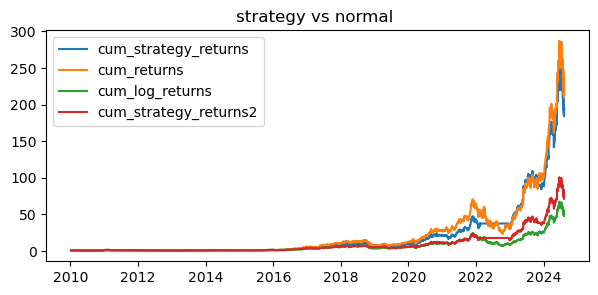

In [964]:
plt.figure(figsize=(7,3))
plt.plot(cum_strategy_returns,label="cum_strategy_returns")
plt.plot(cum_returns,label="cum_returns")
plt.plot(cum_log_returns,label="cum_log_returns")
plt.plot(cum_strategy_returns2,label="cum_strategy_returns2")

plt.title("strategy vs normal ")
plt.legend()
plt.show()

In [965]:
def calc_drawdown(cum_strategy_returns):
  
    running_max=np.maximum.accumulate(cum_strategy_returns.dropna())
      #    [1.1, 1.2 , 1.1, , 2.3 , 2.5 ,  2.3] 
    # -> [1.1, 1.2 , 1.2 ,  2.3 ,2.5, 2.5]
    running_max[running_max<1]=1  # any element is less than 1 , considerto be 1
    
    drawdown=(cum_strategy_returns )/running_max -1
    
    return drawdown

In [966]:
drawdown=calc_drawdown(cum_strategy_returns)
max_drawdown=drawdown.min()
max_drawdown
print(f'max_drawdown is : {max_drawdown*100}')

max_drawdown is : -50.11311940224849


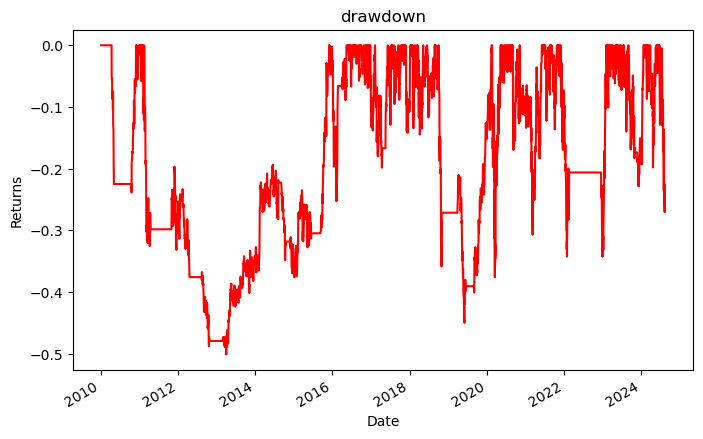

In [967]:
drawdown.plot(figsize=(8,5),title="drawdown", ylabel="Returns" , color='r')
plt.show()